# In-Class Assignment: Linear Regression
# Day 13
# CMSE 202

### <p style="text-align: right;"> &#9989; **Brendan Hunt** </p>
#### <p style="text-align: right;"> &#9989; Put your group member names here</p>


<img src="https://imgs.xkcd.com/comics/extrapolating.png" width=400px>

---
### Goals for today

After this assignment, you will be able to:
* plot a distribution of data
* construct and visualize the correlations between different variables in a data set
* use `statsmodels` to perform a linear regression 
* interpret the quality of the linear fit
* perform a linear regression from scratch

### Agenda for today's class:

1. [Exploring unfamiliar data](#explore)
1. [Linear regression](#regression)
1. [Are we justified in using linear regression?](#justification)
1. [Building the fit from scratch](#scratch)

---
## Part 0: Revisiting Git

It's been a while since we have practiced with git. So,the agenda of this section is to revisit the concepts of Git by creating a new folder inside the cmse202-s24-turnin repository called Day-13 and adding this notebook.

So, for this ICA try:

1. Navigate to your cmse202-s24-turnin local repository.
2. Create a new directory called Day-13.
3. Add the ICA notebook into the new directory.
4. Commit the changes
5. Finally, push your changes to Github.


---
<a id="explore"></a>
## 1. Exploring unfamiliar data 

Abalone are a class of marine snails that create a shell of "nacre" of increasing thickness over the course of their lifetime. A very good indication of the age of a particular abalone is the number of "rings" of nacre that have been deposited in the creation of the shell. We are going to look at a data set that is used to estimate the number of rings of a particular abalone shell based on various other abalone characteristics.

On the course supplemental data repository, there are two files you'll need for this assignment. The first is `Dataset.data` which contains 4177 individual abalone measurements. The second is `Dataset.spec` which contains the labels for the 9 columns. 

Note a couple of things:
* The values in the data file are *space separated*. You should be able to load this data using Pandas.
* The first column is categorical (non-numeric) data. You can ignore it going forward.
* The final column, the count of `rings`, is the **dependent variable** that we will use.

**&#9989; Do This:**  To get started, **you'll need to download the following two files**:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/Dataset.data`

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/Dataset.spec`

### 1.1 Loading and describing the data

**&#9989; Do This:** Using `pandas`, load the data from the data file. Then, calculate and display the following concerning the `rings` data of the samples:
* the max
* the min
* the mean
* the median
* a histogram (using any tool you like) of the distribution of `rings` values

There's more than one way to do this -- you should discuss ideas for how to do with with your group!

(1     0.8150
 2     0.6500
 3     1.1300
 4     2.8255
 5     1.4880
 6     0.7600
 7     1.0050
 8    29.0000
 dtype: float64,
 1    0.0750
 2    0.0550
 3    0.0000
 4    0.0020
 5    0.0010
 6    0.0005
 7    0.0015
 8    1.0000
 dtype: float64,
 1    0.523992
 2    0.407881
 3    0.139516
 4    0.828742
 5    0.359367
 6    0.180594
 7    0.238831
 8    9.933684
 dtype: float64,
 1    0.5450
 2    0.4250
 3    0.1400
 4    0.7995
 5    0.3360
 6    0.1710
 7    0.2340
 8    9.0000
 dtype: float64,
 array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
         <Axes: title={'center': '3'}>],
        [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
         <Axes: title={'center': '6'}>],
        [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
         <Axes: >]], dtype=object))

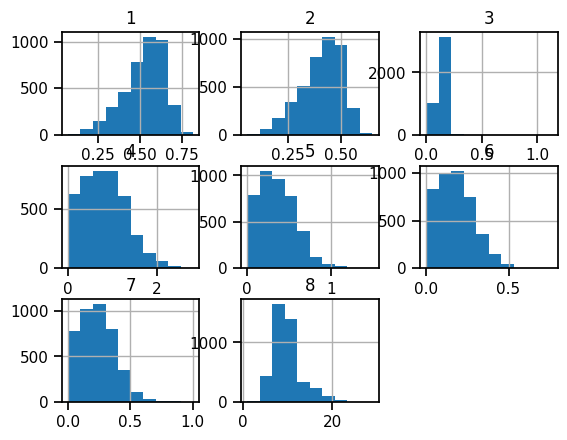

In [1]:
# put your code here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_context("notebook")
df = pd.read_csv("Dataset.data", delim_whitespace=True, header=None)
df = df.iloc[:, 1:]
df.max(),df.min(),df.mean(),df.median(),df.hist()

### 1.2 - Looking at correlations between variables in your data

Let's make a [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) matrix of the variables in the abalone dataset and plot it as a heat map. 

A `pandas` DataFrame has a built-in method that can provide a correlation matrix of the variables in the frame. The values show up as a matrix where the rows and columns are the column headers. The value in each cell is the correlation of that pair of values. The correlation values range from -1 to 1. 
* A correlation of 1 means that the two data elements are _perfectly_ positively correlated. As one goes up, so does the other in exact agreement. 
* A value of -1 means that as one goes up, the other goes down in exact agreement; this is _perfectly_ negatively correlated.
* A correlation value of 0 means there is no correlation. 
* Anything in between -1 and 1 gives the degree to which there is a positive or negative correlation between two variables.
The diagonal of the matrix is all ones since that the correlation of the column with itself.

**What is the `pandas` the method for producing a correlation matrix for a DataFrame?** 

**&#9989; Do This:** Calculate and display the correlation matrix associated with your data. NOTE: Depending on your numpy version, this step might initially give you an error. If this is the case, remove the sex column from the dataframe.

In [2]:
# put your code here
df.columns=['length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
corr=df.corr()
corr

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


**&#9989; Questions:** What do you notice? Can you find variables that correlate strongly with the number of rings? What might make finding these variables this easier?

<font size=+3>&#9998;</font> Nothing correlates

The tools `seaborn` is useful for visualization. You can display a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html), a color for each cell, of a correlation matrix. It gives a visual clue as to what data elements are correlated.

**&#9989; Do this:** Generate a heatmap for the correlation matrix from above and plot it onto the given figure and axis.

<Axes: >

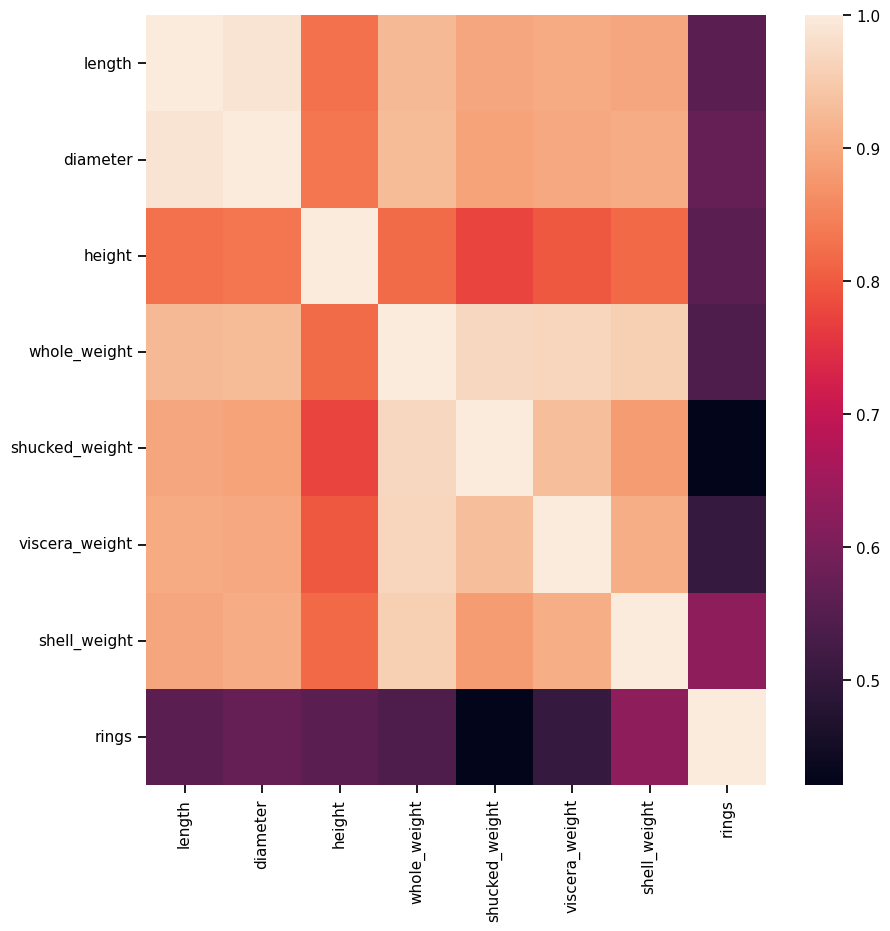

In [3]:
fig, ax = plt.subplots(1,1, figsize = (10,10) )
# put your code here
sns.heatmap(corr)


**&#9989; Questions:** What do you notice? Can you find variables that correlate strongly with the number of rings and do the agree with what you found by examining the correlation matrix? What makes this a better representation of your data than simply the matrix above?

<font size=+3>&#9998;</font> nothing correlates at all 0.5 is VERY weak


---
<a id="regression"></a>
## 2. Linear Regression

Looking at our heatmap, select the independent variable that has the best correlation with the dependent variable `rings`.

**&#9989; Do this:** Write in the cell below what variable you will work with below.

<font size=+3>&#9998;</font> shell_weight

### 2.1 Perform the regression using `statsmodels`

Having selected an independent variable, let us do a linear regression using your selected variable (let's just call it `x`) and the `rings` variable (let's just call that `y`). Using what you reviewed in your pre-class assignment, we'll used `statsmodels` for this. 


**&#9989; Do this:** Using `statsmodels`, perform a linear regression to predict the number of rings using the indepdent variable you selected. **Print the slope and the intercept for your model.**

_Look to the pre-class assignment for some hints and check in with your group._

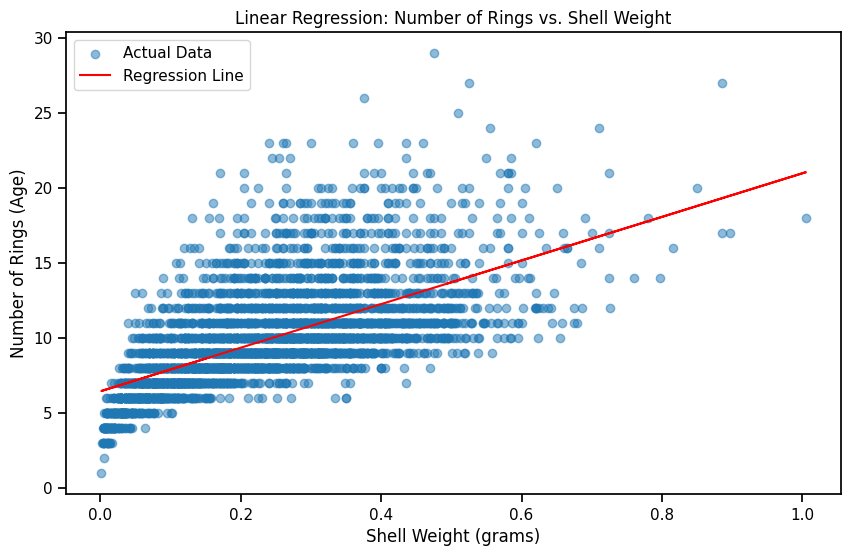

In [4]:
import statsmodels.api as sm
x = df['shell_weight'] 
y = df['rings']         
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const)
results = model.fit()
intercept, slope = results.params
y_predicted = results.predict(x_with_const)
plt.figure(figsize=(10, 6))
plt.scatter(df['shell_weight'], df['rings'], alpha=0.5, label='Actual Data')
plt.plot(x, y_predicted, color='red', label='Regression Line')

plt.xlabel('Shell Weight (grams)')
plt.ylabel('Number of Rings (Age)')
plt.title('Linear Regression: Number of Rings vs. Shell Weight')
plt.legend()
plt.show()


### 2.2 Print statistics

While this model has provided the slope and intercept for the fit, it has not suggested how well the model fits our data. Luckily, the results produced by the `fit()` method can provide a summary.

**&#9989; Do this:** Print the statistics associated with your fit. Comment below that on how well the fit is for the data.

In [5]:
# put your code here
model_summary = results.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rings   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2713.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:17:45   Log-Likelihood:                -9770.8
No. Observations:                4177   AIC:                         1.955e+04
Df Residuals:                    4175   BIC:                         1.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4621      0.077     83.764      0.000       6.311       6.613
shell_weight    14.5357      0.279     52.084      0.000      13.989      15.083
==============================================================================
Omnibus:                     1213.646   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3601.423
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                       6.414   Cond. No.                         7.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**&#9989; Do this:** Comment on the fit of your model. What are you using to judge the fit?

<font size=+3>&#9998;</font> R^2 is very bad. 0.394 is not good and shows a bad correlation

### 2.3 Visualizaton

Mathematically, any data can be fit to a line. Whether a line is a good model to use to fit that data depends on a number of issues. Once of the more famous examples of data being fit to a line where that data has precisely the same fit, but wildly different data is [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). The main figure is reproduced below:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/500px-Anscombe%27s_quartet_3.svg.png" width=500px>

You can see that each data set is different, but the mathematical model that fits each of these data sets is the same! You must be careful that your data do not violate one or more of the [underlying assumptions of linear fitting](https://en.wikipedia.org/wiki/Linear_regression#Assumptions). This is one reason it is incredibly important to visualize your data and the model that fits it.

**&#9989; Question:** For the four plots above, which would you find believable? That is, which ones are reasonable fits to the data and why?

<font size=+3>&#9998;</font> Plot 1

**&#9989; Do this:** Plot the scatter plot of your independent and dependent data and also plot the line predicted by the regression.

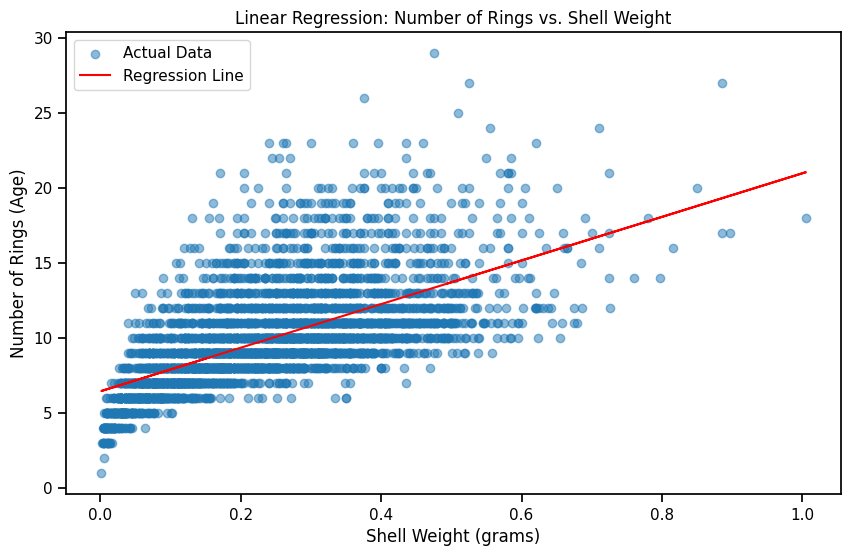

In [6]:
import statsmodels.api as sm
x = df['shell_weight'] 
y = df['rings']         
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const)
results = model.fit()
intercept, slope = results.params
y_predicted = results.predict(x_with_const)
plt.figure(figsize=(10, 6))
plt.scatter(df['shell_weight'], df['rings'], alpha=0.5, label='Actual Data')
plt.plot(x, y_predicted, color='red', label='Regression Line')

plt.xlabel('Shell Weight (grams)')
plt.ylabel('Number of Rings (Age)')
plt.title('Linear Regression: Number of Rings vs. Shell Weight')
plt.legend()
plt.show()



**&#9989; Do this:** How well does your model fit your data? Look back at the measure you used to judge the fit initially, what more information do you gain from plotting the data and the fit? Would you say that you had a good model of your data? What might make your model better?

<font size=+3>&#9998;</font> It fits alright but we could address outliers to better the model.

_Thinking carefully about what model we use to fit data is important, as is how we judge the quality of our models and the fits we come up with. We'll have more opportunities to discuss this in future assignments as well._

---
<a id="justification"></a>|
## 3. Are we justified in using linear regression?

One of the critical assumptions of linear regression is that of ["constant variance"](https://en.wikipedia.org/wiki/Linear_regression#Assumptions). This means that the different values of the dependent variable have the same variance in their errors, regardless of the value of the independent variable. This is typically checked using a residual plot, which is available using `plot_regress_exog`. If the distribution of residuals (a proxy for the errors) is evenly distributed, we can feel more confident that we were justfied is using linear regression.

**&#9989; Do this:** Use `plot_regress_exog` to investigate the distribution of residuals in your model fit. Make sure to create a large enough figure so that everything is easily visible


C:\Users\timtu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


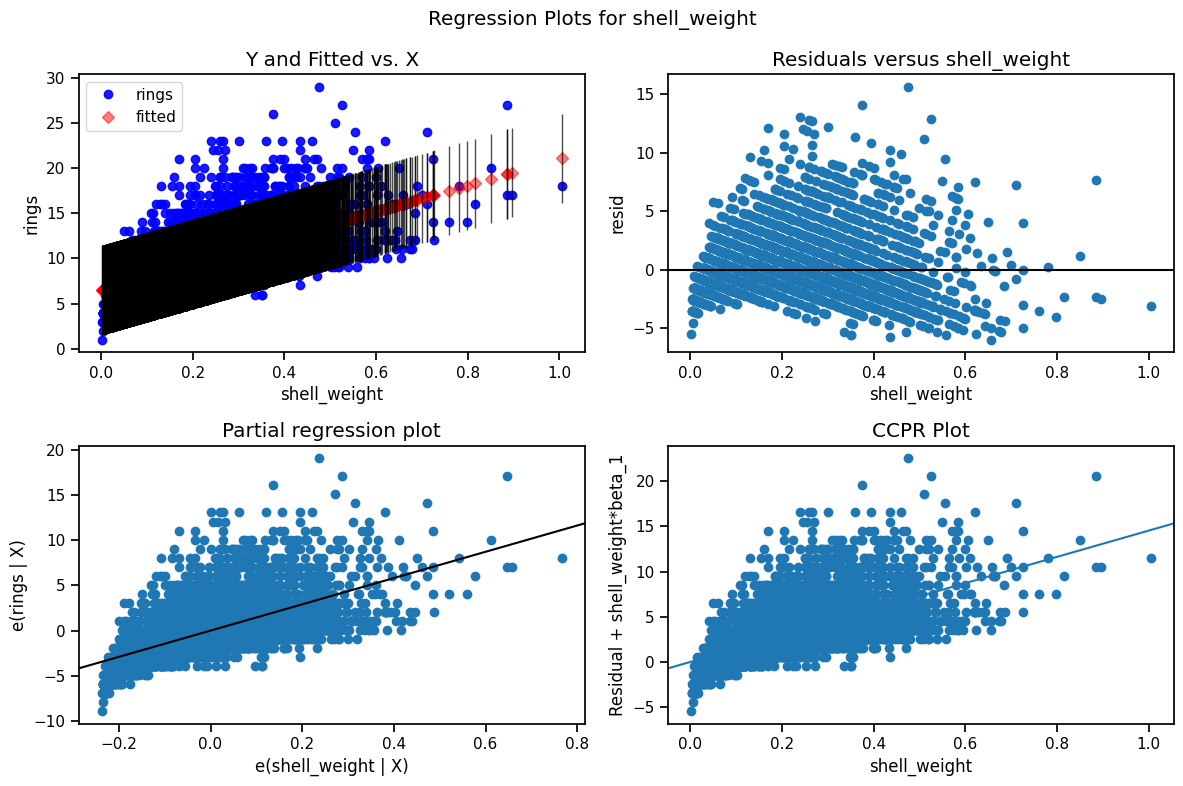

In [9]:
# put your code here
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'shell_weight', fig=fig)



**&#9989; Questions:** Does it appear you were justfied in using linear regression? Why or why not? _If it helps, you might look back at the same plot you made for the `noisy` data in the pre-class assignment._

<font size=+3>&#9998;</font> I think so it looks like it fits a little bit

**&#9989; Questions:**  You might also be able to tell if your linear model overpredicts or underpredicts the number of rings with this model for certain values of your independent variable. Can you? If so, does it over/under-predict?

<font size=+3>&#9998;</font> Underpredicts

---
<a id="scratch"></a>
## 4. Building the fit from scratch

The `statsmodels` library is quite powerful and has a number of tools that we will use to fit data. But in the simplest fit it can do, a linear model of one variable, what is the library doing? You will perform the calculations yourself below to try construct the same fit to your data.


### 4.1 Performing a Least Squares fit

Let's do some of that work ourselves to see if we can reproduce those results. We are going do the math for linear regression ourselves and see if our math agrees with the tools we used above. Below is the math. We'll use the same independent and dependent variables that you chose above.

Let's assume that the symbols $\bar{x}$ and $\bar{y}$ represent the means of those arrays and that `n` is the number of elements.

Here's the calculation for the slope for a single variable linear model:
$$ slope = \frac {\sum_{i=1}^{n}{(x_i - \bar{x}) * (y_i - \bar{y}) } } {\sum_{i=1}^{n}{(x_i - \bar{x})^2}}$$

Here's the calculation for the intercept for a single variable linear model:
$$ intercept = \bar{y} - slope*\bar{x} $$

**&#9989; Do this:** Using the same independent variable and the same dependent variable as above, calculate the slope and intercept of the best fit least squares using the formula provided. Print the slope and the intercept.

In [12]:
x = df['shell_weight']
y = df['rings']
x_bar = np.mean(x)
y_bar = np.mean(y)
numerator = np.sum((x - x_bar) * (y - y_bar))
denominator = np.sum((x - x_bar)**2)
slope_scratch = numerator / denominator
intercept_scratch = y_bar - slope_scratch * x_bar

print(slope_scratch)
print(intercept_scratch)

14.5356752609872
6.46211664699607


**&#9989; Question:** How well do your slope and intercept agree with the results from `statsmodels`?

They agree alright

**&#9989; Do this:**  Plot the same scatter plot for your data you used above and plot the new regression line through that data using your **calculated slope and intercept**.

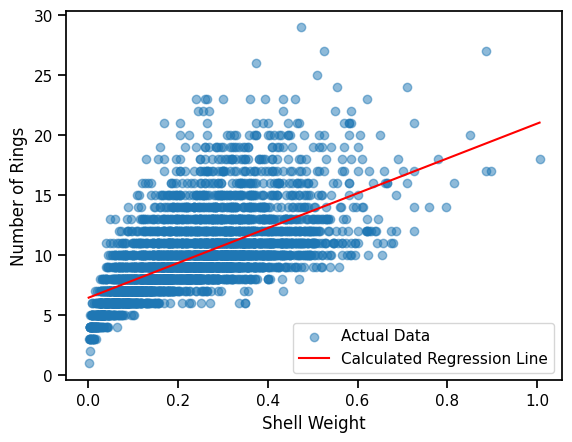

In [14]:
plt.scatter(df['shell_weight'], df['rings'], alpha=0.5, label='Actual Data')
x_values = np.array([min(df['shell_weight']), max(df['shell_weight'])])
y_values = intercept_scratch + slope_scratch * x_values
plt.plot(x_values, y_values, color='red', label='Calculated Regression Line')
plt.xlabel('Shell Weight')
plt.ylabel('Number of Rings')
plt.legend()
plt.show()

### 4.2 Coefficient of Determination and Mean-Squared Error

We will now calculated the [coefficient of determination ($R^2$)](https://en.wikipedia.org/wiki/Coefficient_of_determination) and the mean-squared error (MSE). These results are also produced by `statsmodels` in its summary statistics.

The coefficient of determination calculations are as follows:

Total sum of squares is:
$$ tsum = \sum_{i=1}^{n}{(y_i - \bar{y})^{2}} $$

The sum of the squares of the residuals (also called the residual sum of squares) is:
$$ residual = \sum_{i=1}^{n}{(y_i - y_{predicted})}^{2} $$

Mean-squared error is just $$ MSE = \frac{1}{n} * residual$$ or $$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - y_{predicted})}^{2} $$

The coefficient of determination ($R^2$) is:
$$ cod = R^2 =  1 - \frac{residual}{tsum} $$

**&#9989; Do this:**  Using the same data you used above, develop a new array `y_predict`  based on your **calculated slope and intercept**. Provide the coefficient of determination and mean-squared error of your calculated regression model.

In [15]:
x = df['shell_weight']
y = df['rings']
x_bar = np.mean(x)
y_bar = np.mean(y)
slope_scratch = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar)**2)
intercept_scratch = y_bar - slope_scratch * x_bar
y_predicted_scratch = intercept_scratch + slope_scratch * x
tsum = np.sum((y - y_bar)**2)
residual = np.sum((y - y_predicted_scratch)**2)
MSE_scratch = residual / len(y)
R2_scratch = 1 - (residual / tsum)

slope_scratch, intercept_scratch, R2_scratch, MSE_scratch


(14.5356752609872, 6.46211664699607, 0.39384918134304336, 6.299590441525941)

**&#9989; Question:** How well do your results agree with the results from `statsmodels`?

<font size=+3>&#9998;</font> Similarly

-----
### Congratulations, you're done with your in-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).

&#169; Copyright 2023, The Department of Computational Mathematics, Science and Engineering at Michigan State University.